In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [193]:
parameters0 = {'mean': 0, 'variance': 1, 'prior': 0.95}
parameters1 = {'mean': 1, 'variance': 1, 'prior': 0.05}

In [194]:
# lets plot the gaussains for class 0 and class 1
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

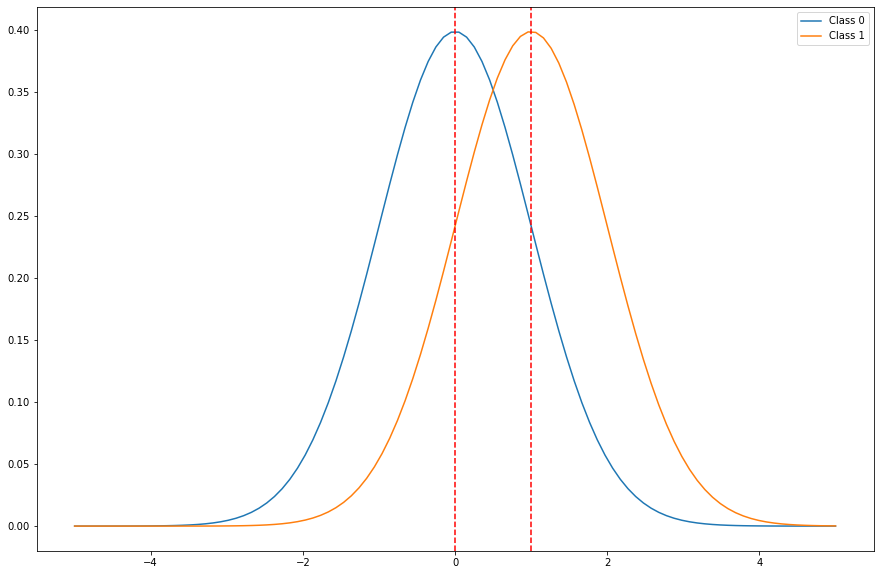

In [195]:
# plot the gaussian for class 0
plt.figure(figsize=(15, 10))
plt.plot(x, np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance']))
plt.plot(x, np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance']))
# draw a vertical line at means of class 0 and class 1
plt.axvline(x=parameters0['mean'], color='r', linestyle='--')
plt.axvline(x=parameters1['mean'], color='r', linestyle='--')
# add the legend
plt.legend(['Class 0', 'Class 1'])

plt.show()

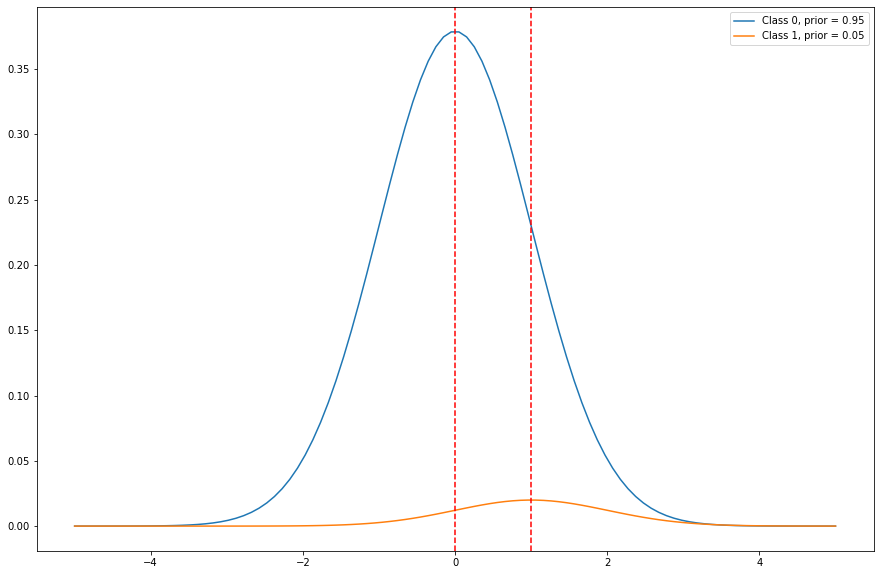

In [196]:
# plot the same figure with their prior probabilities
plt.figure(figsize=(15, 10))
plt.plot(x, np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance']) * parameters0['prior'])
plt.plot(x, np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance']) * parameters1['prior'])
# draw a vertical line at means of class 0 and class 1
plt.axvline(x=parameters0['mean'], color='r', linestyle='--')
plt.axvline(x=parameters1['mean'], color='r', linestyle='--')
# add the legend
plt.legend(['Class 0, prior = ' +  str(parameters0['prior']), 'Class 1, prior = ' + str(parameters1['prior'])])
# mark the values of the means on the vertical lines
plt.show()



In [197]:
# lets find the performance metrics analytically

In [198]:
from random import random
from math import log, cos, sin, sqrt, pi
def sample_standard_normal():
    mu = 0
    sigma = 1
    # we will write our own implementation of np.random.normal()
    # we will use the Box-Muller transform
    r = sqrt(-2*log(random()))
    a = 2*pi*random()
    return sigma*r*cos(a) + mu, sigma*r*sin(a) + mu
  
X = []
for _ in range(50000):
    r = sample_standard_normal()
    X.append(r[0])
    X.append(r[1])


In [199]:
# generate data points for class 0 and 1
x0 = []
x1 = []
sample = []
for i in range(len(X)):
    toss = np.random.random()
    if toss < parameters0['prior']:
        x0.append(X[i]*parameters0['variance'] + parameters0['mean'])
        sample.append([X[i]*parameters0['variance'] + parameters0['mean'], 0])
    else:
        x1.append(X[i]*parameters1['variance'] + parameters1['mean'])
        sample.append([X[i]*parameters1['variance'] + parameters1['mean'], 1])


In [200]:
df = pd.DataFrame(sample, columns=['x', 'y'])

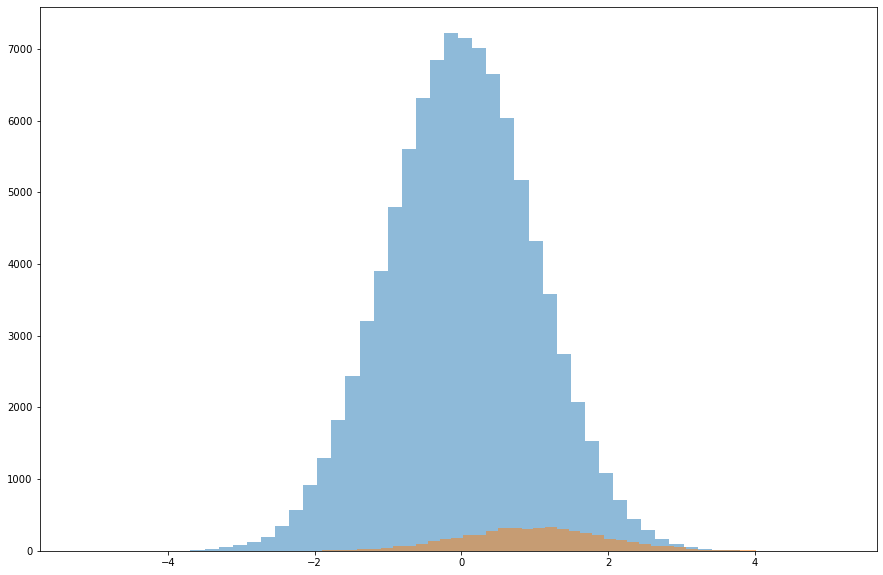

In [201]:
# plot the data points as histograms
plt.figure(figsize=(15, 10))
# plot distribution for class 0 and 1
plt.hist(x0, bins=50, alpha=0.5, label='Class 0')
plt.hist(x1, bins=50, alpha=0.5, label='Class 1')
plt.show()


In [202]:
# create a Bayesian classifier
def bayes_classifier(x, parameters):
    parameters0 = parameters[0]
    parameters1 = parameters[1]
    # calculate the likelihood of class 0
    likelihood0 = np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance'])
    # calculate the likelihood of class 1
    likelihood1 = np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance'])
    # calculate the posterior probability of class 0
    posterior0 = likelihood0 * parameters0['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # calculate the posterior probability of class 1
    posterior1 = likelihood1 * parameters1['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # return the class with the highest posterior probability
    if posterior0 > posterior1:
        return 0
    else:
        return 1
        

In [203]:
# find the predictions_bayesian 
predictions_bayesian = []
for i in range(len(sample)):
    predictions_bayesian.append(bayes_classifier(sample[i][0],[parameters0, parameters1]))



In [204]:
# find the accuracy
accuracy = 0
for i in range(len(sample)):
    if predictions_bayesian[i] == sample[i][1]:
        accuracy += 1
accuracy = accuracy / len(sample)
print('Accuracy: ', accuracy)

Accuracy:  0.94986


In [205]:
# calculate performance metrics
class PerformanceMetrics:
    def __init__(self, predictions, actual):
        self.predictions = predictions
        self.actual = actual

    def accuracy(self):
        accuracy = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == self.actual[i]:
                accuracy += 1
        return accuracy / len(self.predictions)

    def precision(self):
        tp = 0
        fp = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
        if tp + fp == 0:
            return 0
        return tp / (tp + fp)

    def recall(self):
        tp = 0
        fn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
        if tp + fn == 0:
            return 0
        return tp / (tp + fn)

    def f1_score(self):
        p = self.precision()
        r = self.recall()
        if p + r == 0:
            return 0
        return 2 * p * r / (p + r)

    def true_positive_rate(self):
        tp = 0
        fn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
        if tp + fn == 0:
            return 0
        return tp / (tp + fn)

    def true_negative_rate(self):
        tn = 0
        fp = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 0 and self.actual[i] == 0:
                tn += 1
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
        if tn + fp == 0:
            return 0
        return tn / (tn + fp)


    def false_positive_rate(self):
        fp = 0
        tn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
            if self.predictions[i] == 0 and self.actual[i] == 0:
                tn += 1
        if tp + tn == 0:
            return 0
        return fp / (fp + tn)

    def false_negative_rate(self):
        fn = 0
        tp = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
        if tp + fn == 0:
            return 0
        return fn / (fn + tp)

    
    
    def confusion_matrix(self):
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(self.predictions)):
            if self.predictions[i] == 1 and self.actual[i] == 1:
                tp += 1
            if self.predictions[i] == 0 and self.actual[i] == 1:
                fn += 1
            if self.predictions[i] == 1 and self.actual[i] == 0:
                fp += 1
            if self.predictions[i] == 0 and self.actual[i] == 0:
                tn += 1
        return tp, fp, tn, fn


In [206]:
pm = PerformanceMetrics(predictions_bayesian, [i[1] for i in sample])
tp, fp, tn, fn = pm.confusion_matrix()
print('Confusion Matrix:')
print('True Positives: ', tp)
print('False Positives: ', fp)
print('True Negatives: ', tn)
print('False Negatives: ', fn)
print('Accuracy: ', pm.accuracy())
print('Precision: ', pm.precision())
print('Recall: ', pm.recall())
print('F1 Score: ', pm.f1_score())

Confusion Matrix:
True Positives:  42
False Positives:  28
True Negatives:  94944
False Negatives:  4986
Accuracy:  0.94986
Precision:  0.6
Recall:  0.008353221957040573
F1 Score:  0.016477049823460183


In [207]:
# create a Neyman Pearson Classifier.
def neyman_pearson_classifier(x, parameters, lamda):
    parameters0 = parameters[0]
    parameters1 = parameters[1]
    # calculate the likelihood of class 0
    likelihood0 = np.exp(-(x - parameters0['mean']) ** 2 / (2 * parameters0['variance'])) / np.sqrt(2 * np.pi * parameters0['variance'])
    # calculate the likelihood of class 1
    likelihood1 = np.exp(-(x - parameters1['mean']) ** 2 / (2 * parameters1['variance'])) / np.sqrt(2 * np.pi * parameters1['variance'])
    # calculate the posterior probability of class 0
    posterior0 = likelihood0 * parameters0['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # calculate the posterior probability of class 1
    posterior1 = likelihood1 * parameters1['prior'] / (likelihood0 * parameters0['prior'] + likelihood1 * parameters1['prior'])
    # return the class with the highest posterior probability
    if posterior1/ (posterior0 + posterior1) > lamda:
        return 1
    else:
        return 0

In [210]:
predictions_npc = {} 
thresholds = np.arange(0.01, 10 , 0.01)
for i in thresholds:
    print(":",end="")
    predictions_npc[i] = []
    for j in range(len(sample)):
        predictions_npc[i].append(neyman_pearson_classifier(sample[j][0], [parameters0, parameters1], i))

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [ ]:
performance_npc = {}
for i in thresholds:
    pm = PerformanceMetrics(predictions_npc[i], [i[1] for i in sample])
    performance_npc[i] = {'TP_rate': pm.true_positive_rate(), 'TN_rate': pm.true_negative_rate(), 'FP_rate': pm.false_positive_rate(), 'FN_rate': pm.false_negative_rate(), 'Accuracy': pm.accuracy(), 'Precision': pm.precision(), 'Recall': pm.recall(), 'F1_score': pm.f1_score()}

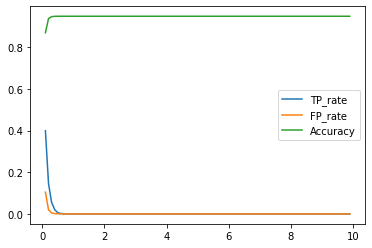

In [ ]:
# plot the performance metrics for npcs
plt.plot(list(performance_npc.keys()), [performance_npc[i]['TP_rate'] for i in thresholds], label='TP_rate')
plt.plot(list(performance_npc.keys()), [performance_npc[i]['FP_rate'] for i in thresholds], label='FP_rate')
plt.plot(list(performance_npc.keys()), [performance_npc[i]['Accuracy'] for i in thresholds], label='Accuracy')
plt.legend()
plt.show()


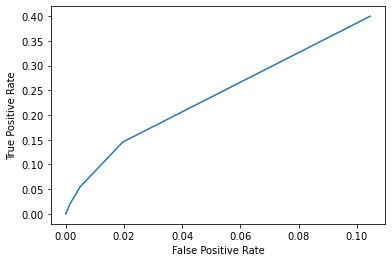

In [ ]:
# plot the ROC curve
Tp =  [performance_npc[i]['TP_rate'] for i in thresholds]
Fp =  [performance_npc[i]['FP_rate'] for i in thresholds]
plt.plot(Fp, Tp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
